# Bonus: Temperature Analysis I

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# "tobs" is "temperature observations"
file = 'Resources/hawaii_measurements.csv'
df = pd.read_csv('Resources/hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [10]:
# Convert the date column format from string to datetime
# Set the date column as the DataFrame index
# Drop the date column
# return the raw data from each month, June and December
june_data = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m",Measurement.date) == '06').all()
december_data = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m",Measurement.date) == '12').all()

# convert raw data to DataFrames to label them and then concatenate into one DataFrame
june_df = pd.DataFrame(june_data,columns=["Date","Temperature"])
december_df = pd.DataFrame(december_data,columns=["Date","Temperature"])
june_df["Month"] = "June"
december_df["Month"] = "December"
temp_df = pd.concat([june_df,december_df], ignore_index=True)

# calculate the average for both June and December
avg_temp_month = temp_df.groupby("Month").mean()
avg_temp_month

,Temperature
Month,
December,71.041529
June,74.944118


### Compare June and December data across all years 

In [11]:
from scipy import stats

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

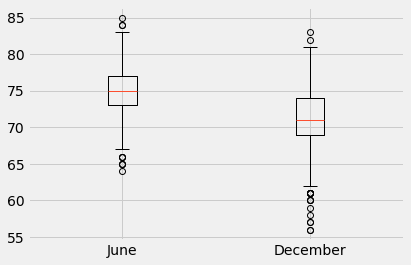

In [12]:
# Filter data for desired months
# Identify the average temperature for June
# Identify the average temperature for December
# Create collections of temperature data
# Run paired t-test

# We will use the t-test to determine if the average temperatures between June and December are statistically 
# significantly different. We will use the unpaired t-test because we are comparing means from separate groups 
# by month that are not dependent on each other

# H0: The difference between the mean temperatures of June and December is equal to zero
# H1: The difference between the mean temperatures of June and June and December is NOT equal to zero

box_data = [june_df["Temperature"],december_df["Temperature"]]
plt.boxplot(box_data,labels=['June', 'December']);
stats.ttest_ind(june_df["Temperature"], december_df["Temperature"])

### Analysis

In [13]:
# The boxplot looks like there is overlap but since the p-value is less than 0.05, we can reject the null hypothesis and conclude that the difference in means is statistically significant and that there is a meaningful difference in temperature between June and December.